In [2]:

import pandas as pd

file_path = '/content/Assessment-2-Associate-DS(in).csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

  weekend_date   channel brand category sub_category  SerailNum  quantity
0     4/6/2022  Channel1    B1     Cat2     Sub-Cat2          1        56
1    11/6/2022  Channel1    B1     Cat2     Sub-Cat2          1       122
2   18/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       102
3   25/06/2022  Channel1    B1     Cat2     Sub-Cat2          1       128
4     2/7/2022  Channel1    B1     Cat2     Sub-Cat2          1        97
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerailNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.9+ KB
None
        SerailNum 

Rows with unparseable dates:


,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
118,NaT,Channel3,B1,Cat3,Sub-Cat4,3,972
119,NaT,Channel3,B1,Cat3,Sub-Cat4,3,1841
120,NaT,Channel3,B1,Cat3,Sub-Cat4,3,7090
121,NaT,Channel3,B1,Cat3,Sub-Cat4,3,425
122,NaT,Channel3,B1,Cat3,Sub-Cat4,3,5177
...,...,...,...,...,...,...,...
219,NaT,Channel3,B1,Cat3,Sub-Cat4,3,6
220,NaT,Channel3,B1,Cat3,Sub-Cat4,3,255
221,NaT,Channel3,B1,Cat3,Sub-Cat4,3,267
222,NaT,Channel3,B1,Cat3,Sub-Cat4,3,132


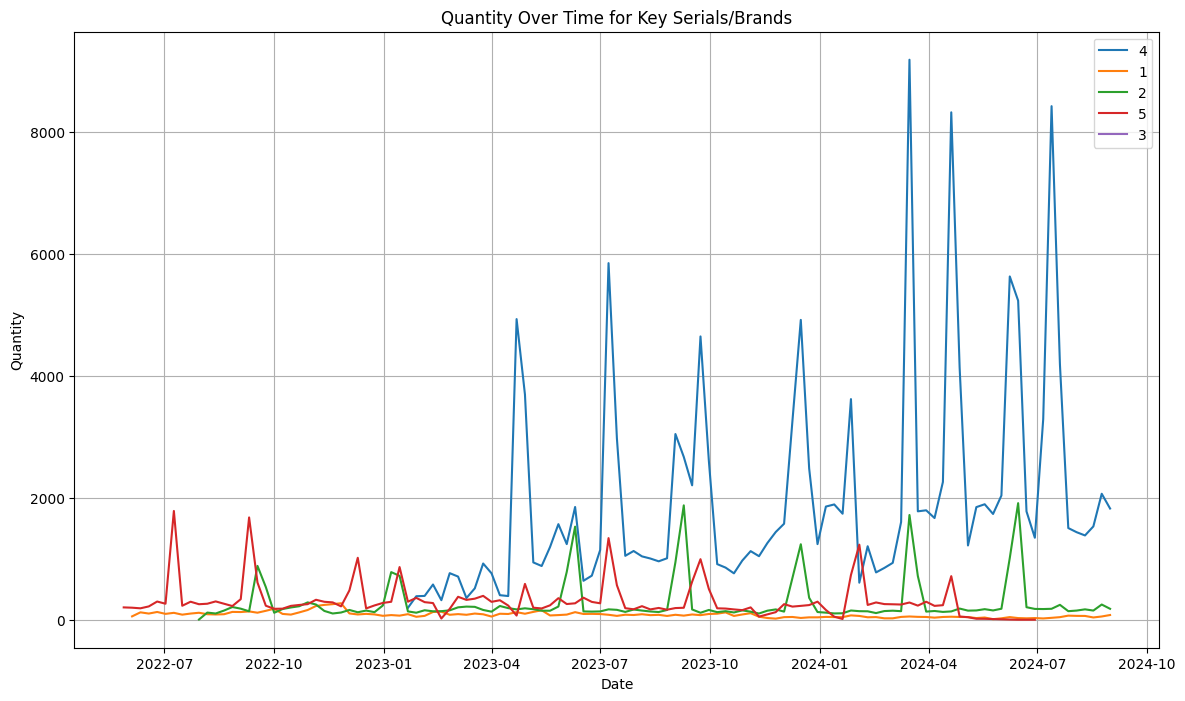

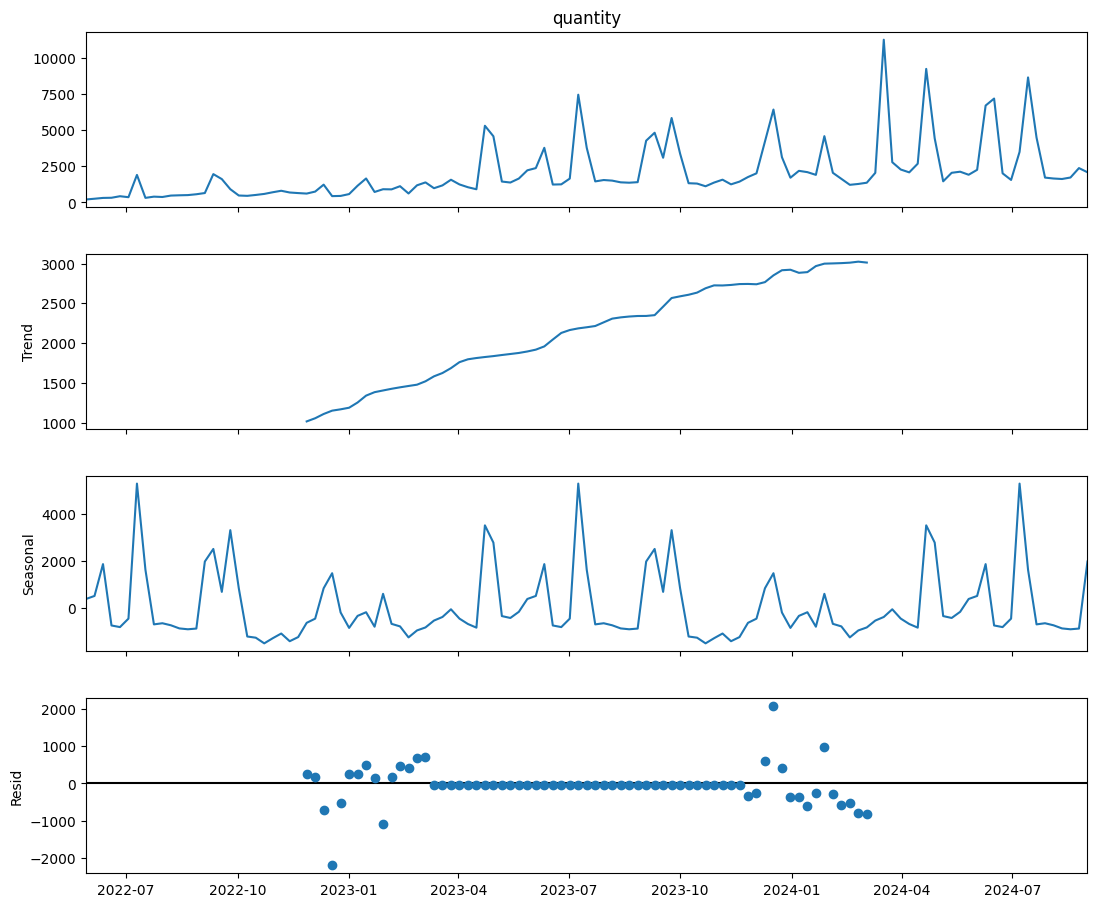

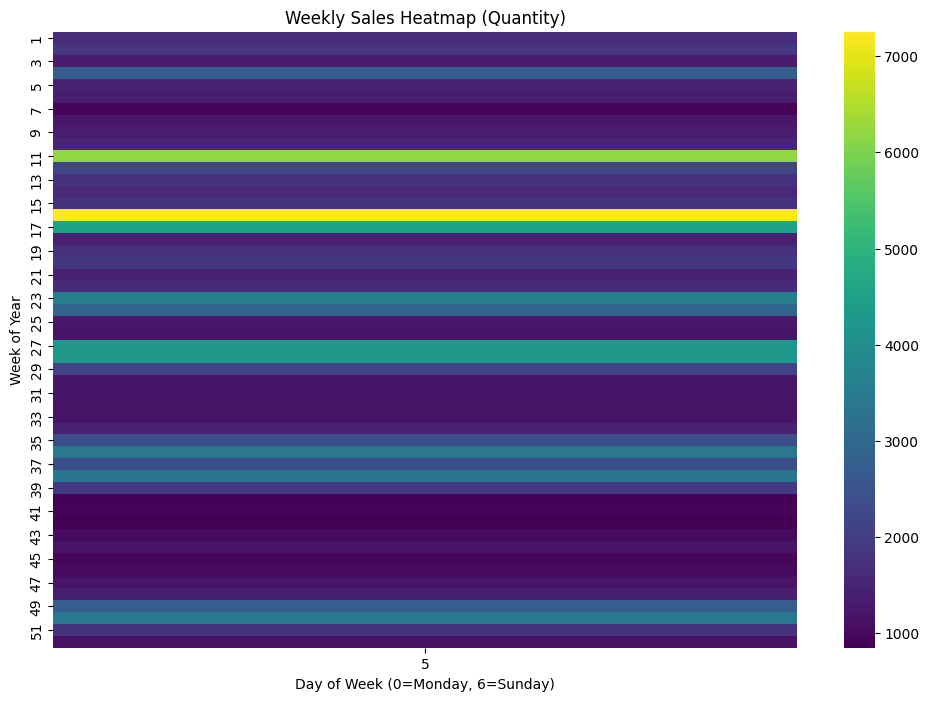

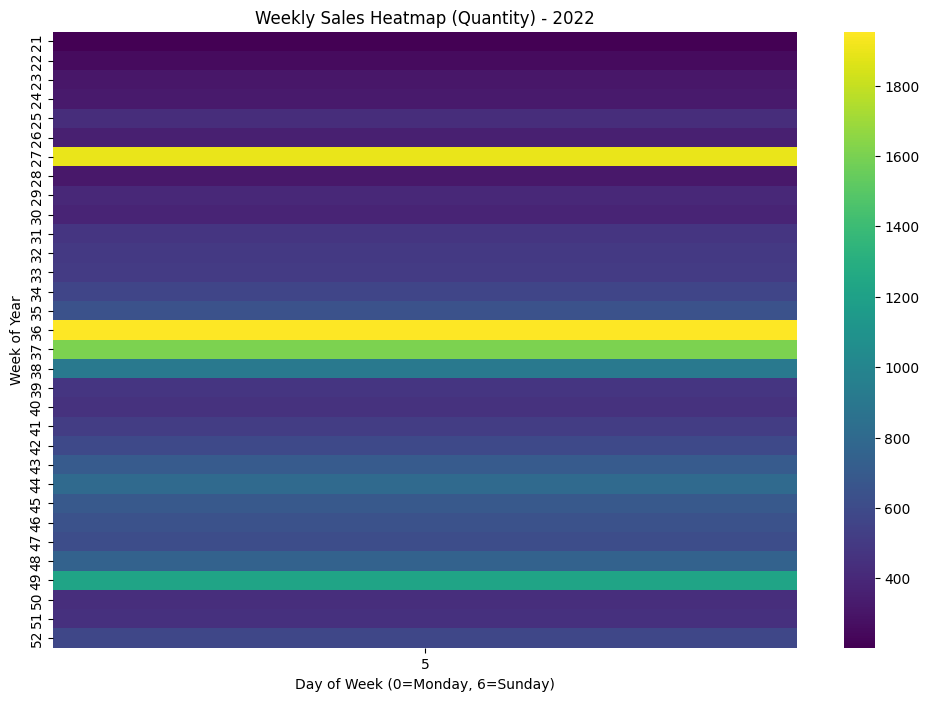

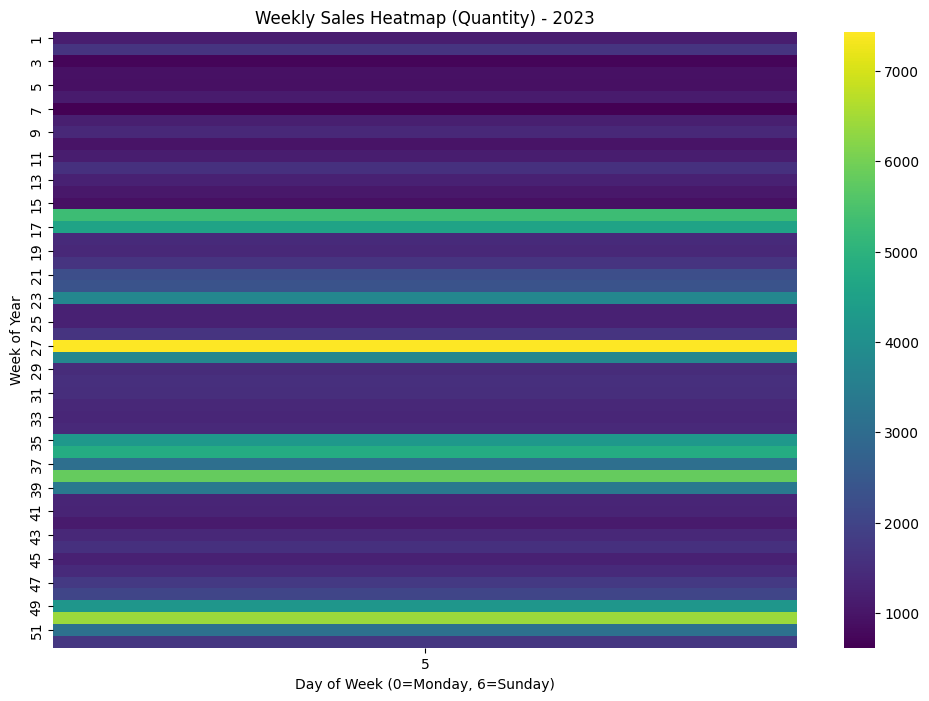

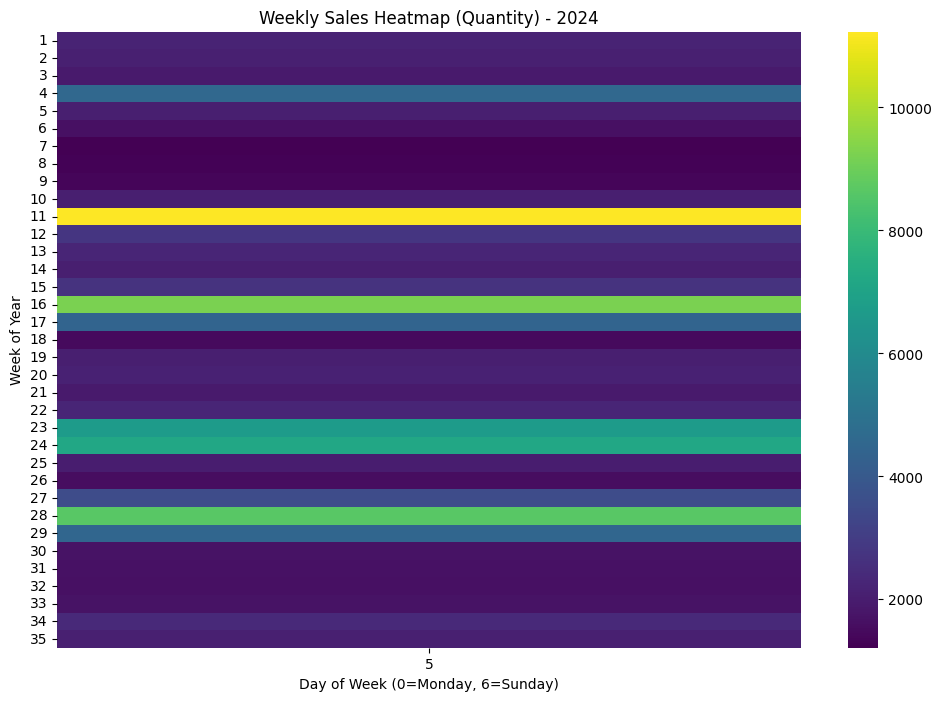

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Date is in datetime format
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True)

# --- Line plot of quantity over time for key serials or brands ---

# Identify some key serials or brands (you might need to adjust based on your data)
# Let's take the top 5 most frequent serials/brands as an example
top_serials = df['SerailNum'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(14, 8))
for serial in top_serials:
    serial_df = df[df['SerailNum'] == serial]
    # Group by date and sum the quantity for each serial
    serial_time_series = serial_df.groupby('weekend_date')['quantity'].sum()
    plt.plot(serial_time_series.index, serial_time_series.values, label=serial)

plt.title('Quantity Over Time for Key Serials/Brands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# --- Seasonal decomposition ---

# For seasonal decomposition, we need a time series.
# Let's use the total quantity sold over time as an example.
# You might want to perform this for individual serials/brands if needed.
total_quantity_ts = df.groupby('weekend_date')['quantity'].sum()

# Resample to a regular frequency (e.g., weekly) for seasonal decomposition
# Using 'W' for weekly frequency. You might need to adjust based on your data's granularity
# and expected seasonality period.
weekly_quantity_ts = total_quantity_ts.resample('W').sum().fillna(0)

# Perform seasonal decomposition
# The period should be the number of data points in a complete cycle.
# If seasonality is yearly on weekly data, period = 52.
# If seasonality is quarterly on weekly data, period = 13.
# Adjust the period based on your understanding of the data's seasonality.
decomposition = seasonal_decompose(weekly_quantity_ts, model='additive', period=52)

fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

# --- Weekly sales heatmap/calendar view ---

# Extract Year, Week of Year, and Day of Week
df['Year'] = df['weekend_date'].dt.year
df['Week'] = df['weekend_date'].dt.isocalendar().week.astype(int)
df['DayOfWeek'] = df['weekend_date'].dt.dayofweek # Monday=0, Sunday=6

# Group by Year, Week, and Day of Week to get total quantity for each day of the week in each week of the year
weekly_daily_sales = df.groupby(['Year', 'Week', 'DayOfWeek'])['quantity'].sum().reset_index()

# Create a pivot table for the heatmap
# Rows are weeks, columns are days of the week
heatmap_data = weekly_daily_sales.pivot_table(index='Week', columns='DayOfWeek', values='quantity', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f")
plt.title('Weekly Sales Heatmap (Quantity)')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Week of Year')
plt.show()

# Optional: You could also create a heatmap per year
for year in df['Year'].unique():
    year_data = weekly_daily_sales[weekly_daily_sales['Year'] == year]
    heatmap_data_year = year_data.pivot_table(index='Week', columns='DayOfWeek', values='quantity', fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data_year, cmap='viridis', annot=False, fmt=".1f")
    plt.title(f'Weekly Sales Heatmap (Quantity) - {year}')
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Week of Year')
    plt.show()


Potential Outliers (Weekly Total Quantity):
weekend_date
2023-04-23     5291
2023-04-30     4566
2023-07-09     7435
2023-09-03     4261
2023-09-10     4809
2023-09-24     5827
2023-12-10     4207
2023-12-17     6410
2024-01-28     4574
2024-03-17    11231
2024-04-21     9217
2024-04-28     4421
2024-06-09     6686
2024-06-16     7169
2024-07-14     8628
2024-07-21     4473
Name: quantity, dtype: int64


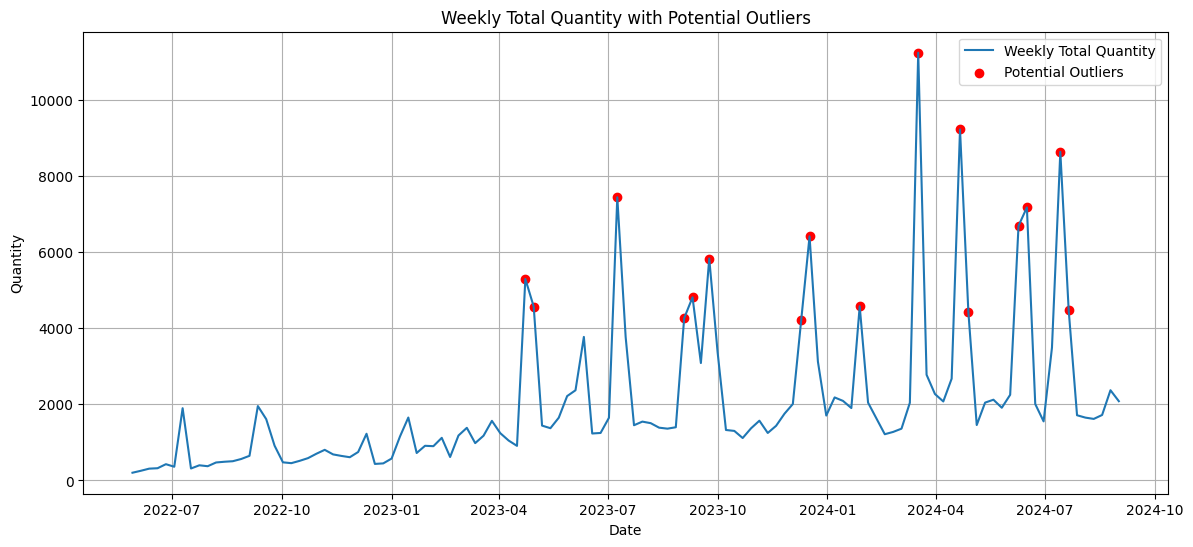


Missing Weekly Intervals:
DatetimeIndex(['2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19',
               '2022-06-26', '2022-07-03', '2022-07-10', '2022-07-17',
               '2022-07-24', '2022-07-31',
               ...
               '2024-06-23', '2024-06-30', '2024-07-07', '2024-07-14',
               '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
               '2024-08-18', '2024-08-25'],
              dtype='datetime64[ns]', length=118, freq='W-SUN')

Influence of Holidays/Festivals:
To assess the influence of holidays/festivals, you would typically need:
1. A list of relevant holidays/festivals with their dates.
2. To merge this holiday data with your sales data based on date.
3. Analyze sales patterns around these dates (e.g., comparing sales during holiday weeks to non-holiday weeks).
This analysis cannot be performed with the current data alone as it does not include holiday information.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# --- Outlier Detection (e.g., using Z-score or IQR on weekly aggregated data) ---

# Let's analyze outliers on the weekly aggregated total quantity
# Ensure weekly_quantity_ts is a pandas Series with datetime index
# (This should be the case if the previous cell executed successfully)

# Drop NaT values before calculating quartiles
weekly_quantity_ts_cleaned = weekly_quantity_ts.dropna()


# Using IQR method for outlier detection
Q1 = weekly_quantity_ts_cleaned.quantile(0.25)
Q3 = weekly_quantity_ts_cleaned.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = weekly_quantity_ts_cleaned[(weekly_quantity_ts_cleaned < lower_bound) | (weekly_quantity_ts_cleaned > upper_bound)]

print("\nPotential Outliers (Weekly Total Quantity):")
print(outliers)

plt.figure(figsize=(14, 6))
plt.plot(weekly_quantity_ts_cleaned.index, weekly_quantity_ts_cleaned.values, label='Weekly Total Quantity')
plt.scatter(outliers.index, outliers.values, color='red', label='Potential Outliers')
plt.title('Weekly Total Quantity with Potential Outliers')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


# --- Check for missing weekly intervals ---

# Get the min and max date from the cleaned data
min_date = df_cleaned['weekend_date'].min()
max_date = df_cleaned['weekend_date'].max()

# Create a full date range at a weekly frequency
full_date_range = pd.date_range(start=min_date.normalize(), end=max_date.normalize(), freq='W')

# Get the dates present in the data (at weekly frequency)
present_dates = df_cleaned['weekend_date'].dt.to_period('W').unique().to_timestamp()

# Find missing dates
missing_dates = full_date_range[~full_date_range.isin(present_dates)]

print("\nMissing Weekly Intervals:")
if not missing_dates.empty:
    print(missing_dates)
else:
    print("No missing weekly intervals found.")

# --- Consideration for Holidays/Festivals (requires external data) ---

print("\nInfluence of Holidays/Festivals:")
print("To assess the influence of holidays/festivals, you would typically need:")
print("1. A list of relevant holidays/festivals with their dates.")
print("2. To merge this holiday data with your sales data based on date.")
print("3. Analyze sales patterns around these dates (e.g., comparing sales during holiday weeks to non-holiday weeks).")
print("This analysis cannot be performed with the current data alone as it does not include holiday information.")

In [13]:

import pandas as pd
# Resample to a regular weekly frequency and fill missing dates
# Aggregate quantity by the weekend date
df_weekly = df.groupby('weekend_date')['quantity'].sum().reset_index()

# Create a complete date range from the min to max date in the data, with weekly frequency
min_date = df_weekly['weekend_date'].min()
max_date = df_weekly['weekend_date'].max()
all_weeks = pd.date_range(start=min_date, end=max_date, freq='W-SAT') # Assuming weekend_date is the Saturday

# Create a new DataFrame with the complete weekly date range
full_weekly_df = pd.DataFrame({'weekend_date': all_weeks})

# Merge the actual weekly sales data with the full date range.
# This will introduce NaNs for weeks with no data.
df_weekly_complete = pd.merge(full_weekly_df, df_weekly, on='weekend_date', how='left')

# Fill missing values: choose either fillna(0) or interpolate()
# Option 1: Fill with 0
df_weekly_complete['quantity'] = df_weekly_complete['quantity'].fillna(0)

# Option 2: Interpolate (if you want to estimate missing values based on surrounding data)
# df_weekly_complete['quantity'] = df_weekly_complete['quantity'].interpolate(method='time')

print("\nDataFrame with ensured weekly data and filled missing points:")
print(df_weekly_complete.head())
print(df_weekly_complete.info())

# Create the year_week column
df_weekly_complete['year_week'] = df_weekly_complete['weekend_date'].dt.strftime('%Y-%U')

print("\nDataFrame with year_week column:")
print(df_weekly_complete.head())

# Split Data
# Training data: All data before June 2024 (before 2024-06-01)
train_end_date = pd.to_datetime('2024-06-01')
df_train = df_weekly_complete[df_weekly_complete['weekend_date'] < train_end_date].copy()

# Validation data: June, July, August 2024
val_start_date = pd.to_datetime('2024-06-01')
val_end_date = pd.to_datetime('2024-09-01') # End date is exclusive
df_val = df_weekly_complete[(df_weekly_complete['weekend_date'] >= val_start_date) & (df_weekly_complete['weekend_date'] < val_end_date)].copy()

print("\nTraining Data Shape:", df_train.shape)
print("Validation Data Shape:", df_val.shape)

print("\nTraining Data Head:")
print(df_train.head())

print("\nValidation Data Head:")
print(df_val.head())


DataFrame with ensured weekly data and filled missing points:
  weekend_date  quantity
0   2022-05-28       203
1   2022-06-04       254
2   2022-06-11       310
3   2022-06-18       321
4   2022-06-25       427
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   weekend_date  119 non-null    datetime64[ns]
 1   quantity      119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB
None

DataFrame with year_week column:
  weekend_date  quantity year_week
0   2022-05-28       203   2022-21
1   2022-06-04       254   2022-22
2   2022-06-11       310   2022-23
3   2022-06-18       321   2022-24
4   2022-06-25       427   2022-25

Training Data Shape: (105, 3)
Validation Data Shape: (14, 3)

Training Data Head:
  weekend_date  quantity year_week
0   2022-05-28       203   2022-21
1   2022-06-04       254

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/o83fm5zb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/h_kb6jeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42966', 'data', 'file=/tmp/tmpsqr41ox7/o83fm5zb.json', 'init=/tmp/tmpsqr41ox7/h_kb6jeq.json', 'output', 'file=/tmp/tmpsqr41ox7/prophet_model89mc7x2x/prophet_model-20250702063338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:38 - cmdstanpy - INFO - Chain


Prophet Model Evaluation on Validation Set:
RMSE: 2373.03
MAE: 2042.55


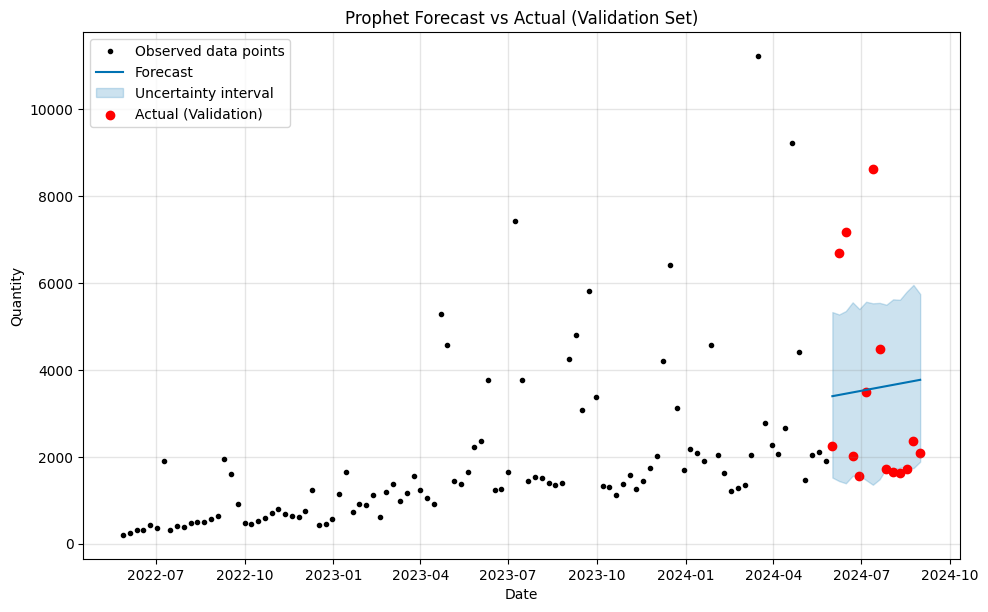

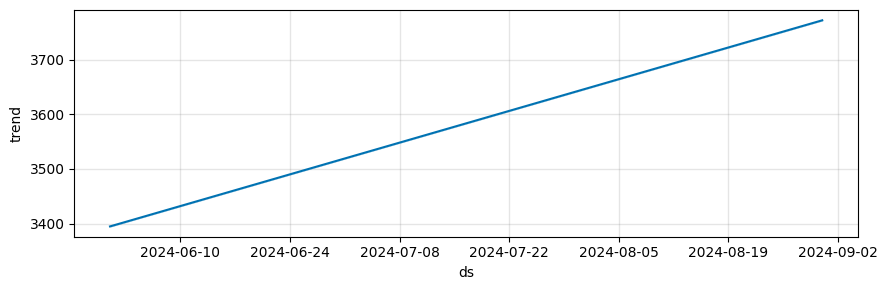

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare data for Prophet (requires 'ds' for datetime and 'y' for value)
# We will use the weekly aggregated data df_weekly_complete
prophet_df_train = df_train[['weekend_date', 'quantity']].rename(columns={'weekend_date': 'ds', 'quantity': 'y'})
prophet_df_val = df_val[['weekend_date', 'quantity']].rename(columns={'weekend_date': 'ds', 'quantity': 'y'})

# Initialize Prophet model
# seasonality_mode='additive' is often suitable for sales data
# You might need to tune seasonality_period if your weekly data has non-standard cycles
# You could also add changepoint_prior_scale to control flexibility of the trend
model = Prophet(seasonality_mode='additive')

# Fit the model on the training data
model.fit(prophet_df_train)

# Make future dataframe for validation period
# Determine the number of periods to forecast based on the validation set length
future_periods = len(prophet_df_val)
future = model.make_future_dataframe(periods=future_periods, freq='W-SAT', include_history=False)

# Predict
forecast = model.predict(future)

# Merge actual validation values with the forecast
# Ensure the validation dataframe has the same date format as the forecast dataframe
prophet_df_val['ds'] = pd.to_datetime(prophet_df_val['ds']) # Convert to datetime objects
forecast_val = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], prophet_df_val, on='ds', how='left')

# Evaluate the forecast on the validation set
# Drop rows where actual validation data is missing (if any) before calculating metrics
forecast_val_cleaned = forecast_val.dropna(subset=['y'])

if not forecast_val_cleaned.empty:
    y_true = forecast_val_cleaned['y']
    y_pred = forecast_val_cleaned['yhat']

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    # Consider adding Mean Absolute Percentage Error (MAPE) if applicable
    # mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 # Be cautious with zeros in y_true

    print(f"\nProphet Model Evaluation on Validation Set:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    # print(f"MAPE: {mape:.2f}%") # Uncomment if you calculate MAPE

    # Plot the forecast vs actual validation data
    fig1 = model.plot(forecast)
    plt.scatter(forecast_val_cleaned['ds'], forecast_val_cleaned['y'], color='red', label='Actual (Validation)')
    plt.title('Prophet Forecast vs Actual (Validation Set)')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    # Plot the components of the forecast
    fig2 = model.plot_components(forecast)
    plt.show()

else:
    print("\nNo actual validation data found to evaluate the forecast.")

# --- Optional: Retrain on full data and forecast further into the future ---
# If satisfied with validation results, retrain on the full dataset
# prophet_df_full = df_weekly_complete[['weekend_date', 'quantity']].rename(columns={'weekend_date': 'ds', 'quantity': 'y'})
# model_full = Prophet(seasonality_mode='additive')
# model_full.fit(prophet_df_full)

# Forecast for the next N periods (e.g., 12 weeks)
# future_full = model_full.make_future_dataframe(periods=12, freq='W-SAT')
# forecast_full = model_full.predict(future_full)

# Plot the forecast on the full dataset
# fig_full = model_full.plot(forecast_full)
# plt.title('Prophet Forecast (Full Dataset)')
# plt.show()

# fig_components_full = model_full.plot_components(forecast_full)
# plt.show()

In [15]:
import pandas as pd
# Compute Monthly Accuracy for Validation Period (June-Aug 2024)

# Ensure 'ds' is datetime in forecast_val
forecast_val_cleaned['ds'] = pd.to_datetime(forecast_val_cleaned['ds'])

# Extract Month
forecast_val_cleaned['month'] = forecast_val_cleaned['ds'].dt.month
forecast_val_cleaned['month_name'] = forecast_val_cleaned['ds'].dt.strftime('%B')

# Group by month and calculate required sums
monthly_accuracy_data = forecast_val_cleaned.groupby('month_name').agg(
    sum_abs_error=('yhat', lambda x: (x - forecast_val_cleaned.loc[x.index, 'y']).abs().sum()),
    sum_actual=('y', 'sum')
).reset_index()

# Calculate monthly accuracy
# Accuracy = 1 - (Sum |y_hat - y| / Sum y)
monthly_accuracy_data['accuracy'] = 1 - (monthly_accuracy_data['sum_abs_error'] / monthly_accuracy_data['sum_actual'])

print("\nMonthly Accuracy for Validation Period (June-Aug 2024):")
print(monthly_accuracy_data[['month_name', 'accuracy']])

# If you need per-SerialNum accuracy, the previous Prophet model setup needs adjustment.
# Prophet is typically applied to a single time series. To forecast per SerialNum,
# you would need to loop through each unique SerialNum, train a separate Prophet model
# for each, make predictions, and then combine and evaluate. This is significantly more complex.

# The current code aggregates quantity across all SerialNums before modeling.
# Therefore, we can only provide aggregated monthly accuracy based on the total quantity.


Monthly Accuracy for Validation Period (June-Aug 2024):
  month_name  accuracy
0     August  0.031928
1       July  0.568118
2       June  0.412121


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/vwa0k1fx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/15m4jvk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23946', 'data', 'file=/tmp/tmpsqr41ox7/vwa0k1fx.json', 'init=/tmp/tmpsqr41ox7/15m4jvk1.json', 'output', 'file=/tmp/tmpsqr41ox7/prophet_modelt_l0yrgb/prophet_model-20250702063601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting for SerialNum: 1


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/iahjhknh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/xop8el_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5514', 'data', 'file=/tmp/tmpsqr41ox7/iahjhknh.json', 'init=/tmp/tmpsqr41ox7/xop8el_l.json', 'output', 'file=/tmp/tmpsqr41ox7/prophet_model76mdbh5p/prophet_model-20250702063601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

Forecasting for SerialNum: 3
No data found for SerialNum 3.
Forecasting for SerialNum: 5
Forecasting for SerialNum: 2
Forecasting for SerialNum: 4


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/n71y6kpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsqr41ox7/vpx4dct0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78046', 'data', 'file=/tmp/tmpsqr41ox7/n71y6kpl.json', 'init=/tmp/tmpsqr41ox7/vpx4dct0.json', 'output', 'file=/tmp/tmpsqr41ox7/prophet_modelbqf66mv_/prophet_model-20250702063601.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:36:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Forecast DataFrame (Sept-Nov 2024):
   SerialNum weekend_date  forecasted_quantity
0          1   2024-09-07                 42.0
1          1   2024-09-14                 45.0
2          1   2024-09-21                 50.0
3          1   2024-09-28                 53.0
4          1   2024-10-05                 48.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SerialNum            52 non-null     int64         
 1   weekend_date         52 non-null     datetime64[ns]
 2   forecasted_quantity  52 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 KB
None
       SerialNum         weekend_date  forecasted_quantity
count  52.000000                   52            52.000000
mean    3.000000  2024-10-19 00:00:00           983.826923
min     1.000000  2024-09-07 00:00:00      

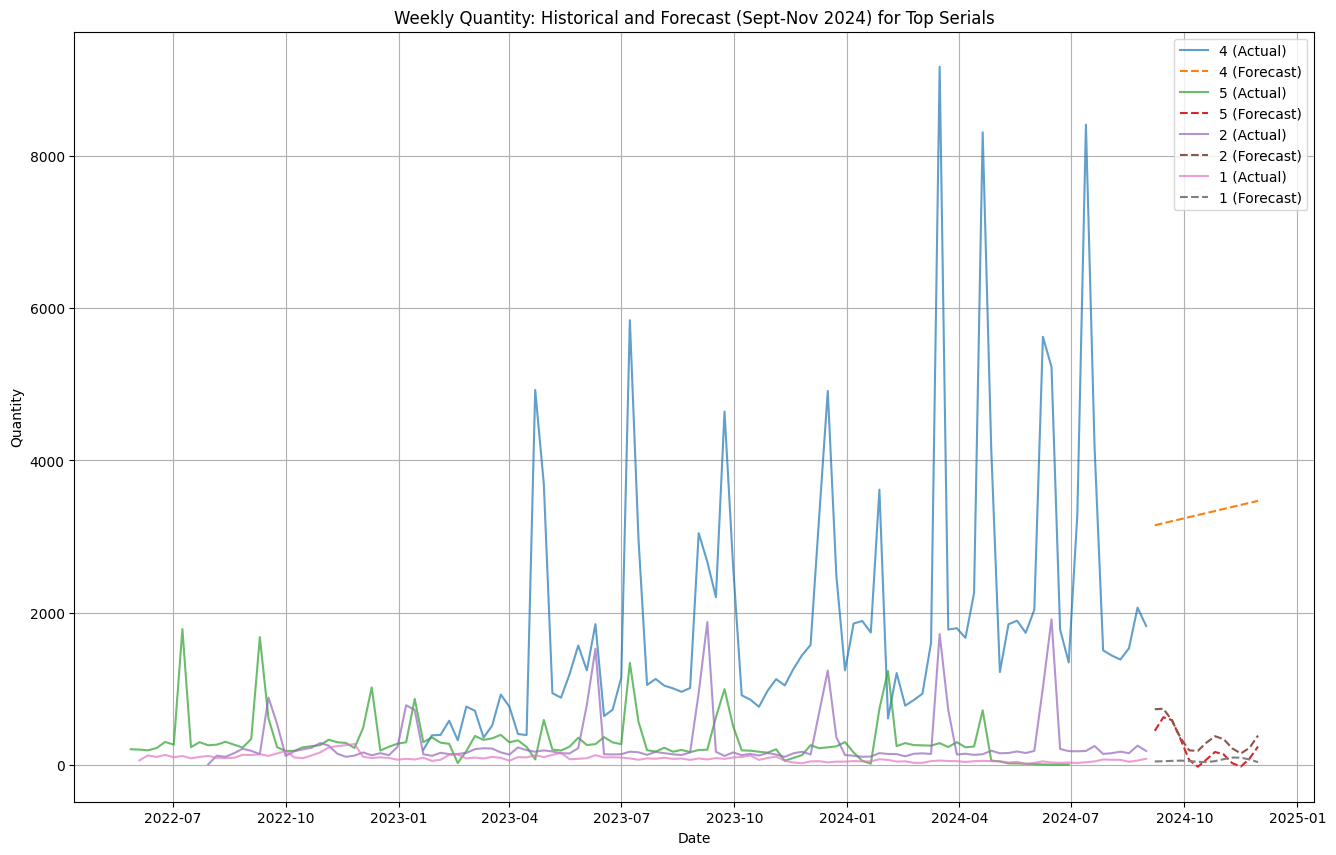

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# Prepare data for Prophet per SerialNum
# This requires looping through each unique SerialNum and creating a time series
unique_serials = df['SerailNum'].unique()

all_forecasts = []

# Define the forecast period
forecast_start_date = pd.to_datetime('2024-09-01')
forecast_end_date = pd.to_datetime('2024-11-30')
# Create a weekly date range for the forecast period
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W-SAT')

for serial in unique_serials:
    print(f"Forecasting for SerialNum: {serial}")
    serial_df = df[df['SerailNum'] == serial].copy()

    # Aggregate quantity by weekend_date for this serial
    serial_weekly_ts = serial_df.groupby('weekend_date')['quantity'].sum().reset_index()

    # Create a complete weekly date range for this serial's historical data
    if not serial_weekly_ts.empty:
        min_date_serial = serial_weekly_ts['weekend_date'].min()
        max_date_serial = serial_weekly_ts['weekend_date'].max()
        all_weeks_serial = pd.date_range(start=min_date_serial, end=max_date_serial, freq='W-SAT')
        full_weekly_serial_df = pd.DataFrame({'weekend_date': all_weeks_serial})

        # Merge with actual data and fill missing weeks with 0
        serial_weekly_complete = pd.merge(full_weekly_serial_df, serial_weekly_ts, on='weekend_date', how='left')
        serial_weekly_complete['quantity'] = serial_weekly_complete['quantity'].fillna(0)

        # Prepare data for Prophet ('ds' for datetime, 'y' for quantity)
        prophet_serial_df = serial_weekly_complete[['weekend_date', 'quantity']].rename(columns={'weekend_date': 'ds', 'quantity': 'y'})

        # Ensure enough data points for Prophet (Prophet generally needs at least a few periods)
        if len(prophet_serial_df) > 2: # Adjust this threshold as needed
            try:
                # Initialize and fit Prophet model
                model_serial = Prophet(seasonality_mode='additive') # Or 'multiplicative'
                model_serial.fit(prophet_serial_df)

                # Make future dataframe for the forecast period (Sept-Nov 2024)
                future_serial = pd.DataFrame({'ds': forecast_dates})

                # Predict
                forecast_serial = model_serial.predict(future_serial)

                # Add SerialNum to the forecast results
                forecast_serial['SerialNum'] = serial

                # Select relevant columns and rename for final output
                serial_forecast_output = forecast_serial[['SerialNum', 'ds', 'yhat']].copy()
                serial_forecast_output = serial_forecast_output.rename(columns={'ds': 'weekend_date', 'yhat': 'forecasted_quantity'})

                all_forecasts.append(serial_forecast_output)

                # Plot weekly predictions for this serial (optional, can be too many plots)
                # plt.figure(figsize=(12, 6))
                # plt.plot(prophet_serial_df['ds'], prophet_serial_df['y'], label='Historical Actual')
                # plt.plot(forecast_serial['ds'], forecast_serial['yhat'], label='Forecast')
                # plt.fill_between(forecast_serial['ds'], forecast_serial['yhat_lower'], forecast_serial['yhat_upper'], alpha=0.3)
                # plt.title(f'Weekly Forecast for SerialNum: {serial} (Sept-Nov 2024)')
                # plt.xlabel('Date')
                # plt.ylabel('Quantity')
                # plt.legend()
                # plt.show()

            except Exception as e:
                print(f"Could not forecast for SerialNum {serial}: {e}")
        else:
            print(f"Not enough data points for SerialNum {serial} to train Prophet.")
    else:
        print(f"No data found for SerialNum {serial}.")


# Combine all forecasts into a single DataFrame
if all_forecasts:
    forecast_df = pd.concat(all_forecasts, ignore_index=True)

    # Ensure weekend_date is in datetime format
    forecast_df['weekend_date'] = pd.to_datetime(forecast_df['weekend_date'])

    # Round forecasted quantity to nearest integer or 2 decimal places
    forecast_df['forecasted_quantity'] = forecast_df['forecasted_quantity'].round(0) # Round to nearest integer
    # Or round to 2 decimal places: forecast_df['forecasted_quantity'] = forecast_df['forecasted_quantity'].round(2)


    print("\nForecast DataFrame (Sept-Nov 2024):")
    print(forecast_df.head())
    print(forecast_df.info())
    print(forecast_df.describe())

    # --- Plot weekly predictions for top SerialNum or brand ---
    # Get the top 5 serials based on total historical quantity
    top_serials_for_plotting = df.groupby('SerailNum')['quantity'].sum().nlargest(5).index.tolist()

    plt.figure(figsize=(16, 10))

    for serial in top_serials_for_plotting:
        # Get historical data for this serial
        serial_hist_df = df[df['SerailNum'] == serial].groupby('weekend_date')['quantity'].sum().reset_index()
        serial_hist_df['weekend_date'] = pd.to_datetime(serial_hist_df['weekend_date'])

        # Get forecasted data for this serial
        serial_forecast_df = forecast_df[forecast_df['SerialNum'] == serial].copy()
        serial_forecast_df['weekend_date'] = pd.to_datetime(serial_forecast_df['weekend_date'])


        if not serial_forecast_df.empty:
            plt.plot(serial_hist_df['weekend_date'], serial_hist_df['quantity'], label=f'{serial} (Actual)', alpha=0.7)
            plt.plot(serial_forecast_df['weekend_date'], serial_forecast_df['forecasted_quantity'], linestyle='--', label=f'{serial} (Forecast)')

    plt.title('Weekly Quantity: Historical and Forecast (Sept-Nov 2024) for Top Serials')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("\nNo forecasts were generated.")